In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Chargement des données
prolib = pd.read_excel('../data/prolib.xlsx', sheet_name=None)
data = prolib[list(prolib.keys())[0]]
oot_prolib = prolib[list(prolib.keys())[1]] 

samples = pd.read_excel('../data/samples.xlsx', sheet_name=None)
train = samples[list(samples.keys())[0]]
test = samples[list(samples.keys())[1]]
oot_samples = samples[list(samples.keys())[2]] 

# Assemblage des variables (concaténation des lignes des mêmes colonnes)
data = pd.concat([data, oot_prolib], ignore_index=True)
sample = pd.concat([train, test, oot_samples], ignore_index=True)

In [3]:
# Calcul du taux de défaut pour data et sample
taux_defaut_data = (
    data.groupby('datdelhis')['DDefaut_NDB']
    .mean()
    .reset_index()
    .rename(columns={'DDefaut_NDB': 'Taux_de_defaut'})
)

taux_defaut_sample = (
    sample.groupby('datdelhis')['DDefaut_NDB']
    .mean()
    .reset_index()
    .rename(columns={'DDefaut_NDB': 'Taux_de_defaut'})
)

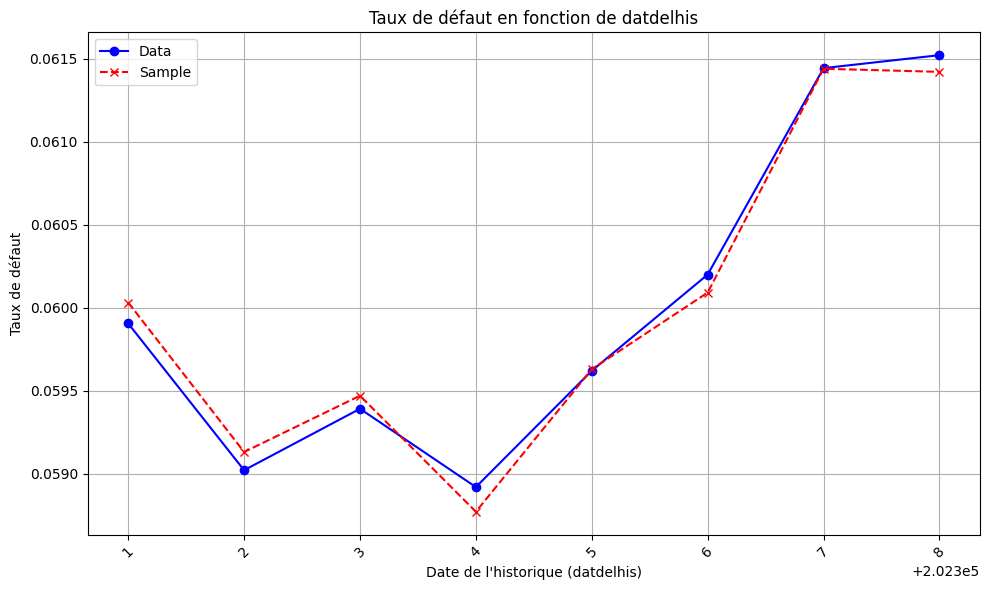

In [4]:

# Affichage des deux courbes sur le même graphique
plt.figure(figsize=(10, 6))
plt.plot(taux_defaut_data['datdelhis'], taux_defaut_data['Taux_de_defaut'], marker='o', linestyle='-', color='b', label='Data')
plt.plot(taux_defaut_sample['datdelhis'], taux_defaut_sample['Taux_de_defaut'], marker='x', linestyle='--', color='r', label='Sample')
plt.title("Taux de défaut en fonction de datdelhis")
plt.xlabel("Date de l'historique (datdelhis)")
plt.ylabel("Taux de défaut")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()